# Air Quality Index

<br>
This project is designed to calculate and predict the Air Quality Index (AQI) using historical data enabling informed decision-making.

## About Dataset
<br>
The dataset used in this project is Air Quality Data in India (2015-2020) that has been made publicly avaliable by the Central Pollution Control Board.<br>
source : https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india


### Importing necessary libraries 

In [7]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [8]:
#Loading the dataset

import pandas as pd
df = pd.read_csv('city_day.csv')

In [9]:
#Displaying top 5 records
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
#Shape of the dataset
df.shape

(29531, 16)

### Dataset Info
**City** - City name where the air quality data is collected and analyzed.<br>
**Date** - Date for which the air quality index (AQI) is calculated.<br>
**PM2.5** - Fine particulate matter (particulate matter with a diameter of 2.5 micrometers or less) concentration in the air.<br>
**PM10** - Particulate matter (particulate matter with a diameter of 10 micrometers or less) concentration in the air.<br>
**NO** - Nitric oxide concentration in the air.<br>
**NO2** - Nitrogen dioxide concentration in the air.<br>
**NOx** - Total nitrogen oxides concentration in the air.<br>
**NH3** - Ammonia concentration in the air.<br>
**CO** - Carbon monoxide concentration in the air.<br>
**SO2** - Sulfur dioxide concentration in the air.<br>
**O3** - Ozone concentration in the air.<br>
**Benzene** - Benzene concentration in the air.<br>
**Toluene** - Toluene concentration in the air.<br>
**Xylene** - Xylene concentration in the air.<br>
**AQI** - Air Quality Index calculated based on the pollutant concentrations.<br>
**AQI_Bucket** - Categorization of the air quality level based on the AQI value<br>


### Handling Missing Values : 

In [15]:
def handleMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missing_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missing_values_array = missing_values_array.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    missing_values_array = missing_values_array[missing_values_array.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    print('\n')
    print('MISSING VALUES IN DATA:\n\n', missing_values_array, '\n')
    
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene', 'Toluene', 'Xylene'], axis=1, inplace=True)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    
    pollutants = ['Particulate_Matter', 'NO2', 'CO', 'SO2', 'O3', 'BTX']
    columns = ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    
    print('\n')
    print('UPDATED DATA:\n\n')
    print(data)
    
    return data, pollutants

In [16]:
updatedCityData, newColumns = handleMissingValues(df)



MISSING VALUES IN DATA:

             Missing Values  % of Total Values
Xylene               18109               61.3
PM10                 11140               37.7
NH3                  10328               35.0
Toluene               8041               27.2
Benzene               5623               19.0
AQI                   4681               15.9
AQI_Bucket            4681               15.9
PM2.5                 4598               15.6
NOx                   4185               14.2
O3                    4022               13.6
SO2                   3854               13.1
NO2                   3585               12.1
NO                    3582               12.1
CO                    2059                7.0 



UPDATED DATA:


            Date           City   AQI    AQI_Bucket  Particulate_Matter  \
0     2015-01-01      Ahmedabad   NaN           NaN                 NaN   
1     2015-01-02      Ahmedabad   NaN           NaN                 NaN   
2     2015-01-03      Ahmedabad   NaN

### Visualising Amount of pollutants

In [19]:
#Calculating max contributing pollutant

def calculateMaxContributingPollutants(data):
    pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    pollutant_contributions = {}

    for pollutant in pollutants:
        pollutant_contributions[pollutant] = data[pollutant].mean()

    max_contributing_pollutant = max(pollutant_contributions, key=pollutant_contributions.get)
    max_contribution_value = pollutant_contributions[max_contributing_pollutant]

    return max_contributing_pollutant, max_contribution_value

# Example dataset (entire database)
data = pd.read_csv("city_day.csv")  # Replace "your_dataset.csv" with your actual dataset file path

max_pollutant, max_contribution = calculateMaxContributingPollutants(data)
print('------------------------------------------------------------------------------')
print('Max Contributing Pollutant to Bad AQI:')
print('Pollutant:', max_pollutant)
print('Contribution Value:', max_contribution)

------------------------------------------------------------------------------
Max Contributing Pollutant to Bad AQI:
Pollutant: PM10
Contribution Value: 118.12710293078102


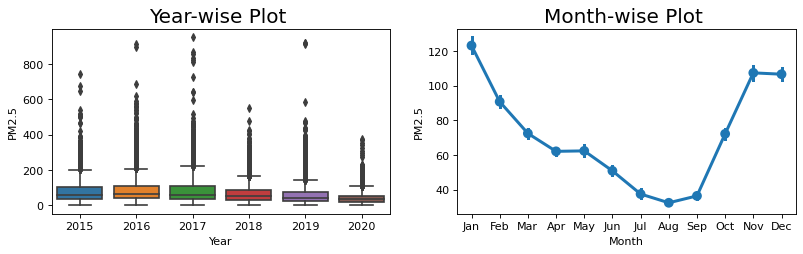

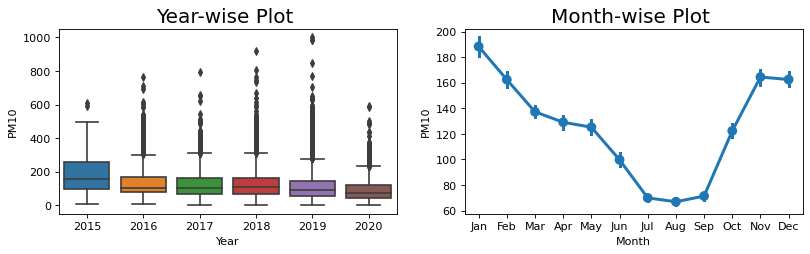

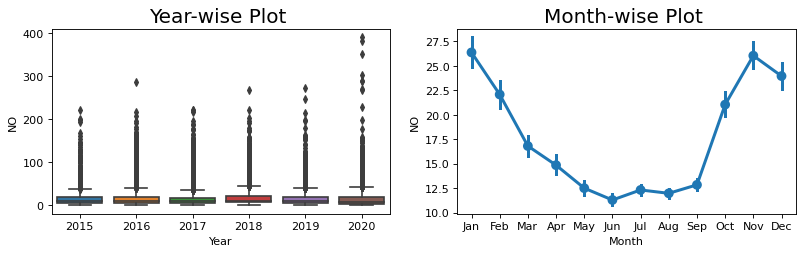

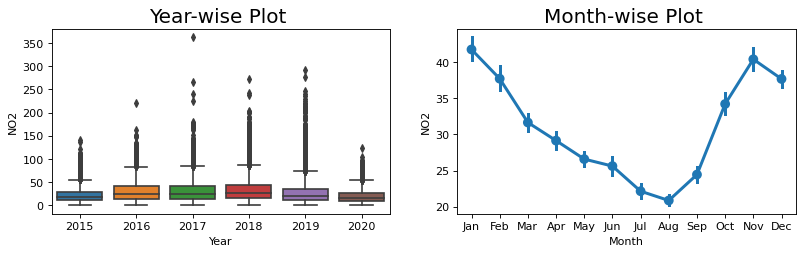

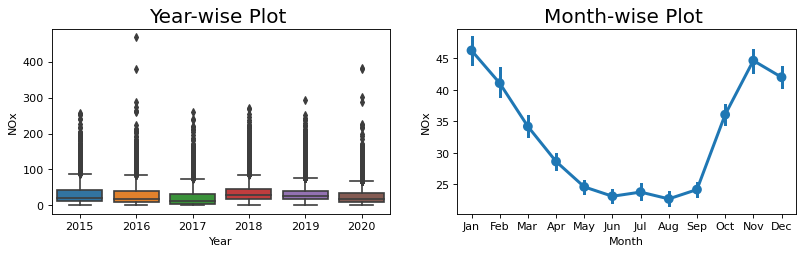

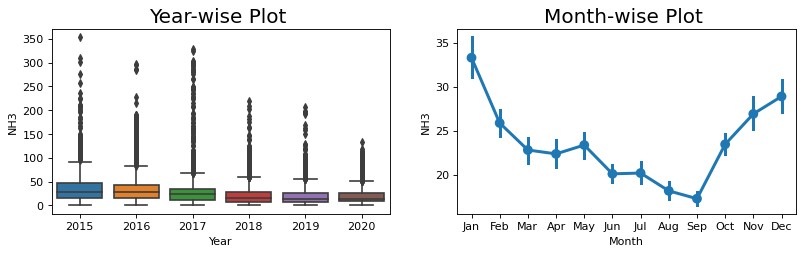

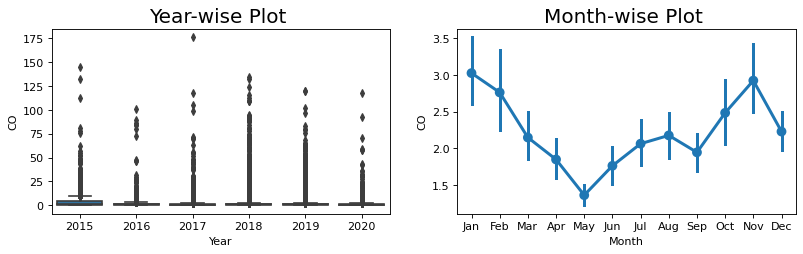

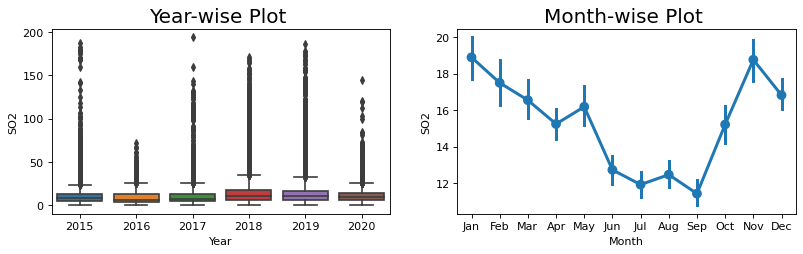

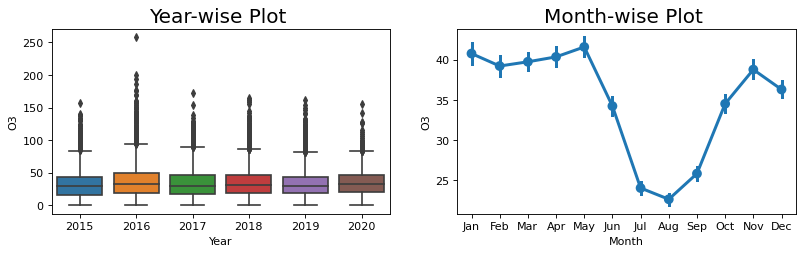

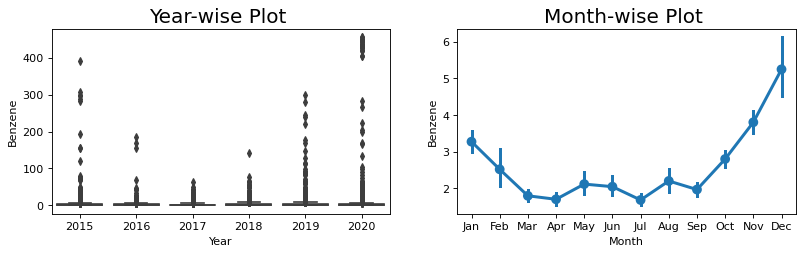

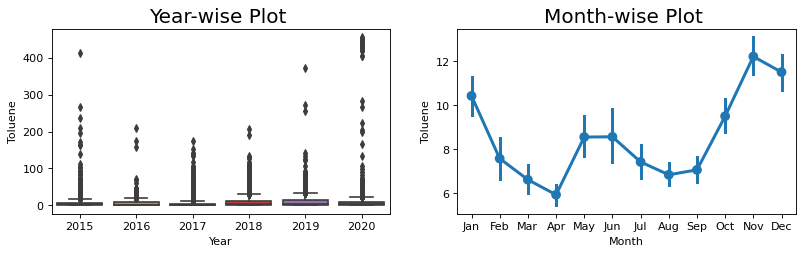

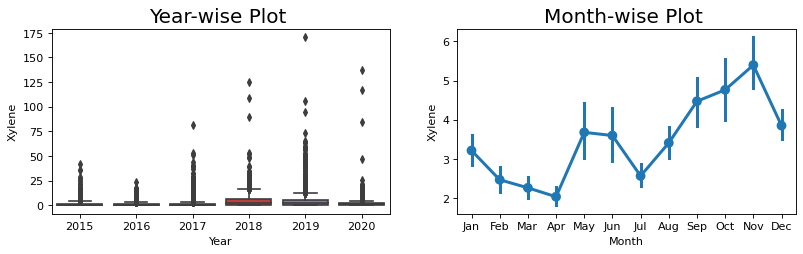

In [25]:
# Year wise and month wise plot for each pollutant


import matplotlib.pyplot as plt
import seaborn as sns

def trend_plot(updatedCityData, value):
    data = updatedCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot ', fontsize=18)
    axes[1].set_title('Month-wise Plot ', fontsize=18)
    plt.show()

values = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
for value in values:
    trend_plot(updatedCityData, data[value])

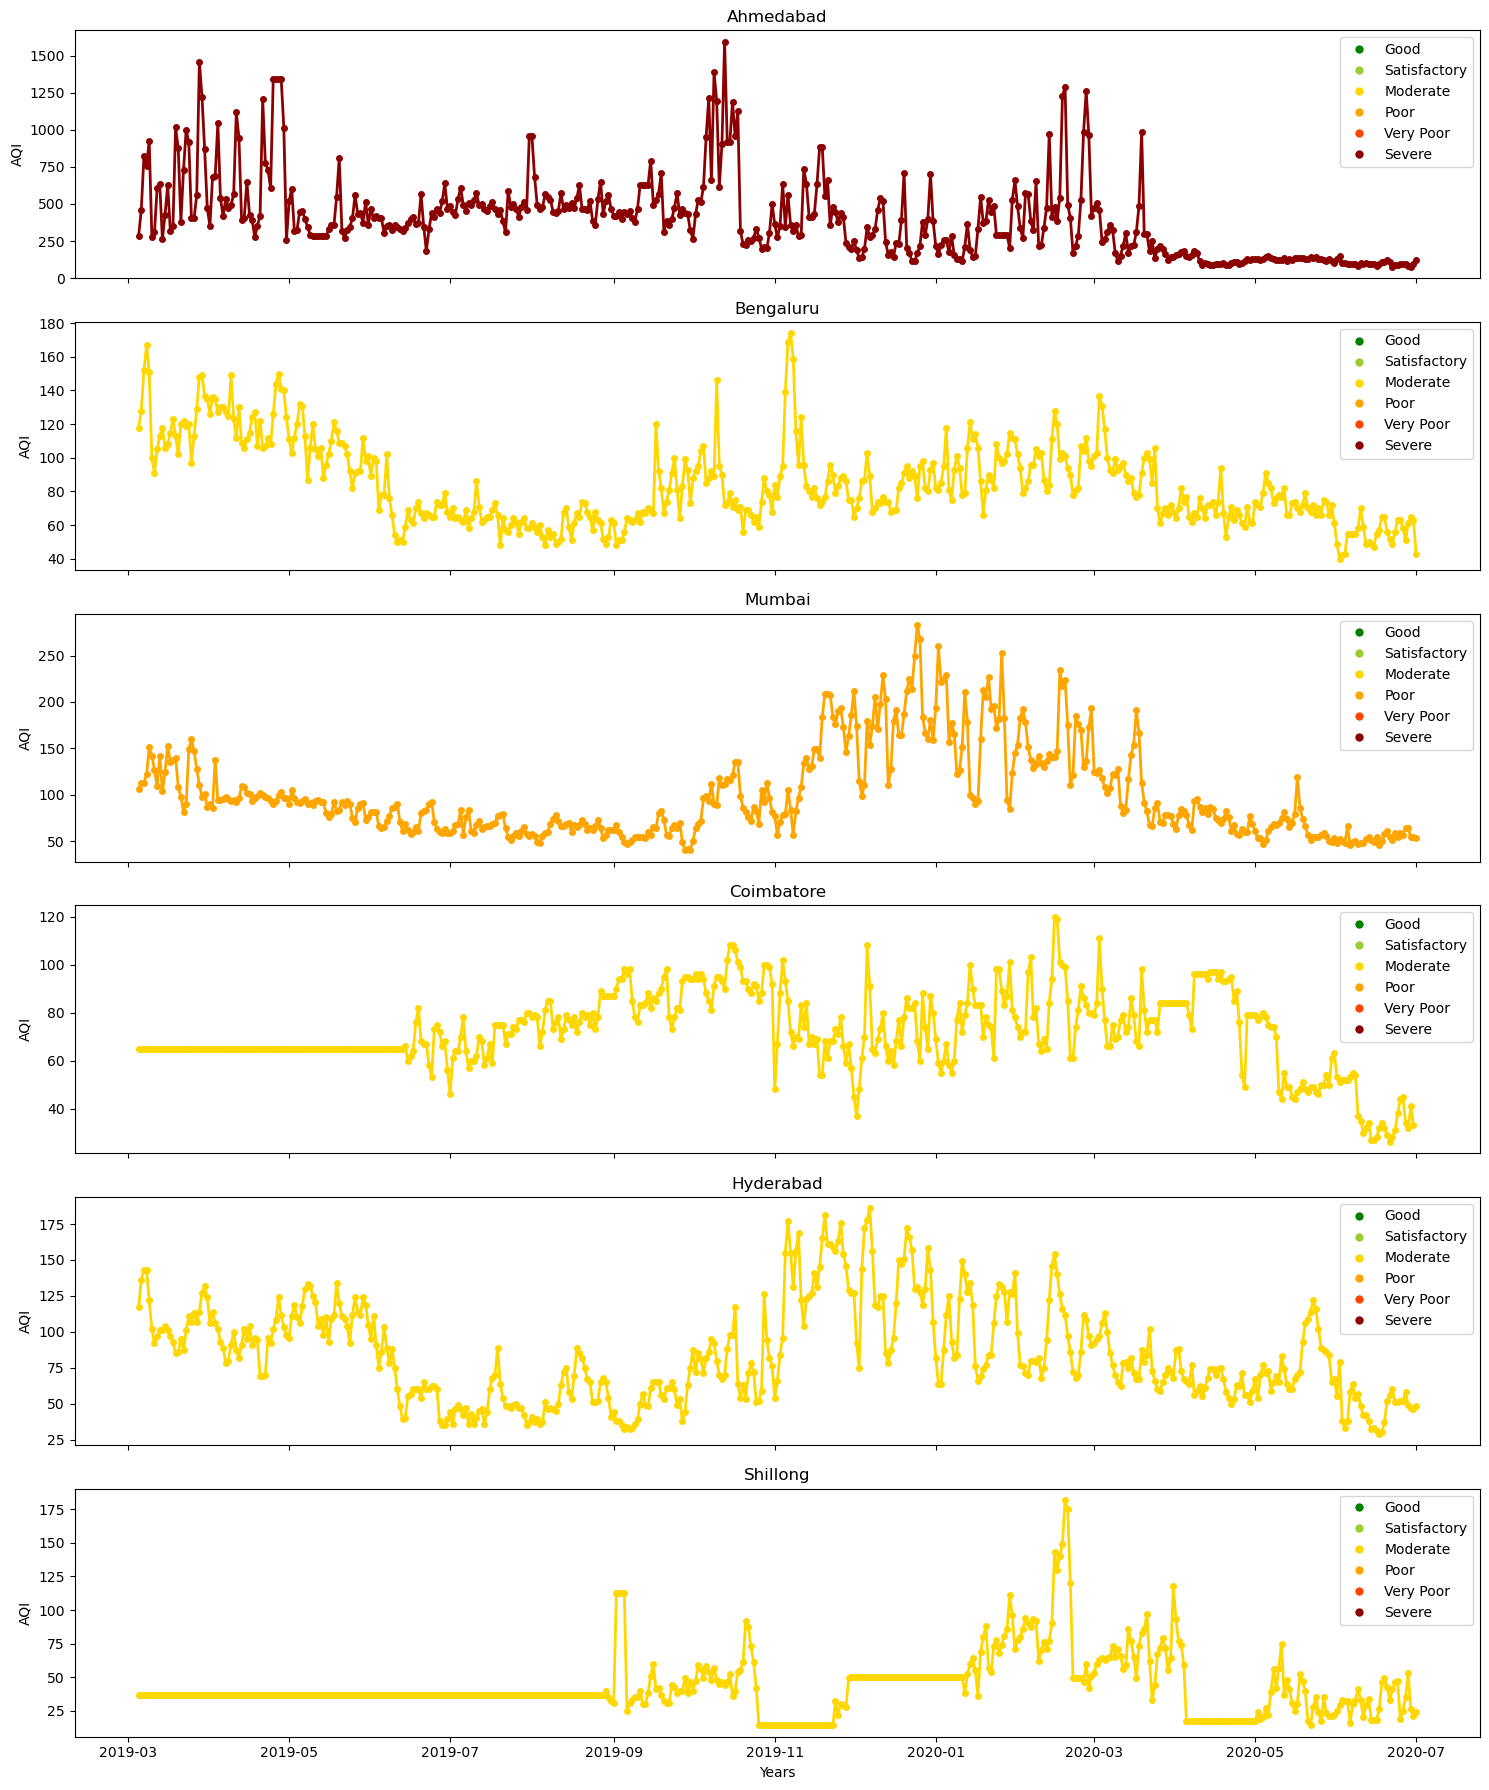

In [33]:
cities = ['Ahmedabad', 'Bengaluru', 'Mumbai', 'Coimbatore', 'Hyderabad', 'Shillong']
filtered_city_day = updatedCityData[updatedCityData['Date'] >= '2019-03-05']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date', 'City', 'AQI', 'AQI_Bucket']]
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill', inplace=True)

def get_color_bar(city):
    max_aqi = AQI_pivot[city].max()
    if max_aqi < 50:
        return 'green'
    elif 50 <= max_aqi < 101:
        return 'yellowgreen'
    elif 101 <= max_aqi < 201:
        return 'gold'
    elif 201 <= max_aqi < 301:
        return 'orange'
    elif 301 <= max_aqi < 401:
        return 'orangered'
    else:
        return 'darkred'

ah = get_color_bar('Ahmedabad')
de = get_color_bar('Bengaluru')
mu = get_color_bar('Mumbai')
ko = get_color_bar('Coimbatore')
hy = get_color_bar('Hyderabad')
ch = get_color_bar('Shillong')

colors = {'Good': 'green', 'Satisfactory': 'yellowgreen', 'Moderate': 'gold',
          'Poor': 'orange', 'Very Poor': 'orangered', 'Severe': 'darkred'}
labels = list(colors.keys())
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=7) for label in labels]

fig, axs = plt.subplots(6, 1, sharex='col', sharey='row', figsize=(15, 18))

for ax, city, color in zip(axs, cities, [ah, de, mu, ko, hy, ch]):
    ax.plot(AQI_pivot.index, AQI_pivot[city], color=color, linewidth=2, marker='o', markersize=4)
    ax.set_title(city)
    ax.set_ylabel('AQI')
    ax.legend(handles, labels, loc='upper right')

axs[-1].set_xlabel('Years')

plt.tight_layout()
plt.show()

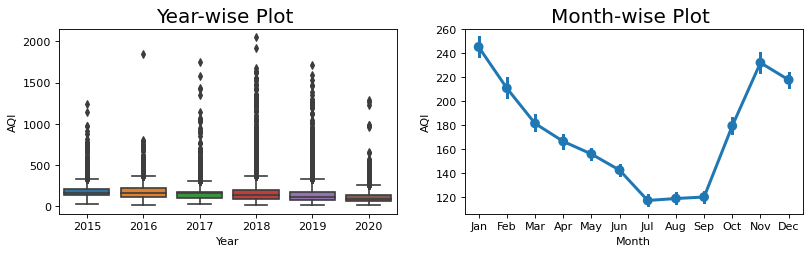

In [39]:
value='AQI'
trend_plot(updatedCityData,value)

## Preprocessing

In [34]:
#Filling Missing Values in Database with most frequent values
updatedCityData['AQI'] = updatedCityData['AQI'].fillna(updatedCityData['AQI'].mean(axis=0))
updatedCityData

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,166.463581,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,166.463581,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,166.463581,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,166.463581,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,166.463581,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.96,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.47,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.64,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.61,29.26,0.52,9.84,28.30,0.00


In [35]:
#formating Date
print(updatedCityData.columns)
updatedCityData['Date'] = pd.to_datetime(updatedCityData['Date'])

# updatedCityData.reset_index()
updatedCityData = updatedCityData[['City','Date','AQI','AQI_Bucket']]
updatedCityData.head()

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'Particulate_Matter', 'NO2', 'CO',
       'SO2', 'O3', 'BTX'],
      dtype='object')


,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,166.463581,NaN
1,Ahmedabad,2015-01-02,166.463581,NaN
2,Ahmedabad,2015-01-03,166.463581,NaN
3,Ahmedabad,2015-01-04,166.463581,NaN
4,Ahmedabad,2015-01-05,166.463581,NaN


In [37]:
cities=pd.unique(updatedCityData['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]
updatedCityData.columns

final_data= pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'), columns=column1)
for city,i in zip(cities, final_data.columns):
    n = len(np.array(updatedCityData[updatedCityData['City'] == city]['AQI']))
    final_data[i][-n:] = np.array(updatedCityData[updatedCityData['City']==city]['AQI'])

final_data=final_data.astype('float64')
final_data=final_data.resample(rule='MS').mean()

final_data.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2020-03-01,273.885922,70.164932,52.548387,86.402051,90.741935,115.206153,139.132239,55.419355,70.290323,103.876524,...,165.187356,130.369793,122.838710,134.000000,104.645161,158.419355,67.870968,128.362744,74.741935,87.724632
2020-04-01,120.733333,39.233333,44.400000,80.259383,68.533333,126.074836,141.728478,48.648786,63.500000,120.200885,...,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,154.368437,133.282119,57.066667,61.797572
2020-05-01,128.677419,24.193548,59.096774,77.677419,73.161290,104.451613,148.400558,74.129032,78.677419,64.933134,...,135.580645,89.997650,53.161290,119.096774,63.935484,138.516129,32.451613,109.737236,55.967742,64.903226
2020-06-01,101.964239,25.715453,47.866667,101.533333,55.166667,71.666667,156.637532,66.500000,103.066667,38.366667,...,136.533333,93.866667,46.466667,96.500000,53.300000,82.366667,41.597572,115.218766,45.400000,82.200000
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,166.463581,66.000000,92.000000,166.463581,...,86.000000,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000
